In [2]:
import pandas as pd
import sys

def clean_print():
    sys.stdout.write("\033[F") #back to previous line 
    sys.stdout.write("\033[K") #clear line
    sys.stdout.write("\033[F") 
    sys.stdout.write("\033[K") 
    sys.stdout.write("\033[F") 
    sys.stdout.write("\033[K") 
    sys.stdout.write("\033[F") 
    sys.stdout.write("\033[K")  
    sys.stdout.write("\033[F")  
    sys.stdout.write("\033[K")  
    sys.stdout.write("\033[F")
    sys.stdout.write("\033[K")
    print("\n")

# Load the dataset
data_path = './cancer patient data sets.csv'
cancer_data = pd.read_csv(data_path)

# Convert 'Level' from categorical to numerical codes
cancer_data['Level_Code'] = cancer_data['Level'].astype('category').cat.codes

# Compute correlation matrix
correlation_matrix = cancer_data.corr()

# Extract correlation with 'Level_Code'
correlation_with_level = correlation_matrix['Level_Code'].sort_values(ascending=False)

# Identify strong correlations based on a threshold
strong_correlations = correlation_with_level[(correlation_with_level > 0.4) | (correlation_with_level < -0.4)]

weak_correlations = correlation_with_level[(correlation_with_level < 0.1) & (correlation_with_level > -0.1)]

# Print the results
print("\tStrong correlations:\n")
print(strong_correlations[1:], end="\r")
clean_print()

print("\tWeak correlations:\n")
print(weak_correlations[:len(weak_correlations)-1], end="\r")
clean_print()


	Strong correlations:

Fatigue                -0.403276
Genetic Risk           -0.423382
chronic Lung Disease   -0.432405
Alcohol use            -0.434071
Chest Pain             -0.494704
Obesity                -0.561961
Air Pollution          -0.577269
Smoking                -0.611087
Balanced Diet          -0.618781
Coughing of Blood      -0.631118
Passive Smoker         -0.638409


	Weak correlations:

Gender                   0.086222
Age                      0.042631
Snoring                  0.014280
Swallowing Difficulty   -0.012880
Weight Loss             -0.020537




Radar Chart Example

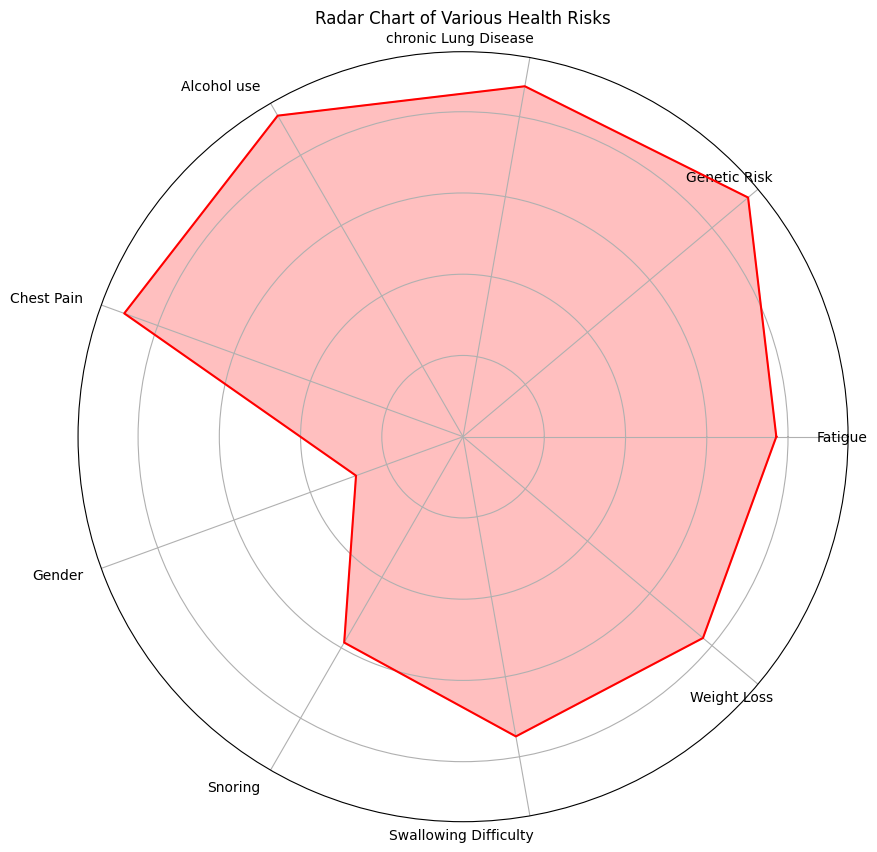

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# strong_categories = strong_correlations.index.tolist()[1:]
strong_categories = strong_correlations.index.tolist()[1:6]
strong_values = cancer_data[strong_categories].mean().tolist()

weak_categories = [cat for cat in weak_correlations.index.tolist()[:-1] if cat != 'Age']
weak_values = cancer_data[weak_categories].mean().tolist()

categories = strong_categories + weak_categories
values = strong_values + weak_values

num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red') 

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45, ha='right')
plt.title('Radar Chart of Various Health Risks')
plt.show()
